In [40]:
import pandas as pd #media,varianza y dev estandar
import matplotlib as plt
import seaborn as sns
import numpy as np # linear algebra
import re # regular expression libary.
import nltk # Natural Language toolkit
from nltk import word_tokenize,sent_tokenize
import nltk as nlp

In [10]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv');
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [11]:
df['Rating'].median() #muestra la media

4.0

In [12]:
df['Rating'].var() #muestra la varianza

1.5203624326830831

In [13]:
df['Rating'].std() #muestra la desviacion estandar

1.2330297776952035

In [14]:
df['Rating'].describe()

count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [18]:
df.isnull().sum()

Review    0
Rating    0
dtype: int64

In [68]:
review_list=[]

for review in df.Review:
    review=re.sub("[^a-zA-z]"," ",review) # if expression in the sentence is not a word then this code change them to space
    review=review.lower() # turns all word in the sentence into lowercase.
    review=nltk.word_tokenize(review) # splits the words that are in the sentence from each other.
    lemma=nlp.WordNetLemmatizer()
    review=[lemma.lemmatize(word) for word in review] # this code finds the root of the word for a word in the sentence and change them to their root form.
    review=" ".join(review)
    review_list.append(review) # store sentences in list
    

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

max_features=500

count_vectorizer=CountVectorizer(max_features=max_features,stop_words="english") 
sparce_matrix=count_vectorizer.fit_transform(review_list).toarray()

In [80]:
sparce_matrix
count_vectorizer

CountVectorizer(max_features=500, stop_words='english')

In [26]:
grafica=print("Top {} Palabras mas usadas: {}".format(max_features,count_vectorizer.get_feature_names()))

Top 500 Palabras mas usadas: ['able', 'absolutely', 'access', 'activity', 'actually', 'afternoon', 'air', 'airport', 'amazing', 'amenity', 'american', 'amsterdam', 'area', 'arrival', 'arrived', 'ask', 'asked', 'ate', 'attraction', 'available', 'average', 'away', 'awesome', 'bad', 'bag', 'balcony', 'bar', 'barcelona', 'basic', 'bath', 'bathroom', 'beach', 'beautiful', 'bed', 'bedroom', 'beer', 'believe', 'best', 'better', 'big', 'bit', 'block', 'book', 'booked', 'booking', 'bottle', 'breakfast', 'bring', 'brought', 'buffet', 'building', 'bus', 'business', 'busy', 'buy', 'ca', 'cab', 'cafe', 'called', 'came', 'cana', 'car', 'card', 'care', 'casino', 'center', 'central', 'centre', 'certainly', 'chair', 'change', 'charge', 'cheap', 'check', 'checked', 'cheese', 'child', 'choice', 'choose', 'chose', 'city', 'clean', 'cleaned', 'close', 'club', 'coffee', 'cold', 'come', 'comfortable', 'coming', 'comment', 'complaint', 'complimentary', 'concierge', 'conditioning', 'convenient', 'cool', 'corne

In [43]:
data=pd.DataFrame(count_vectorizer.get_feature_names(),columns=["Words"])

In [44]:
data.head()

,Words
0,able
1,absolutely
2,access
3,activity
4,actually


In [46]:
df.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

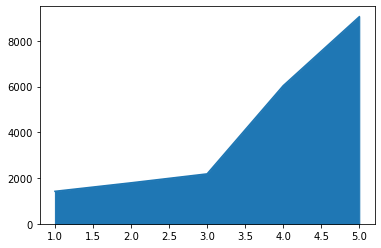

In [42]:
#Utilizar al menos dos formas de graficar con matplotlib
df['Rating'].value_counts().sort_index().plot.area()

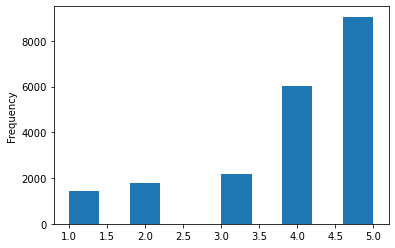

In [34]:
df['Rating'].plot.hist()

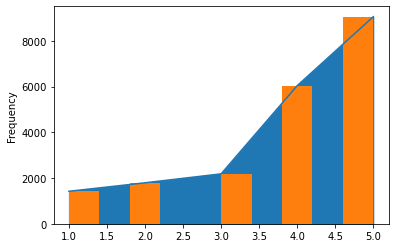

In [35]:
df['Rating'].value_counts().sort_index().plot.area()
df['Rating'].plot.hist()

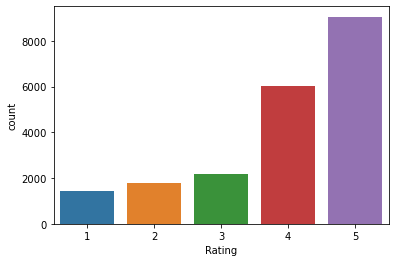

In [36]:
#dos de seaborn
sns.countplot(df['Rating'])

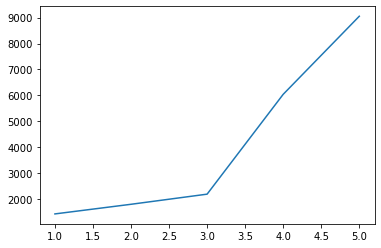

In [37]:
df[df['Rating'] > 0]['Rating'].value_counts().sort_index().plot.line()

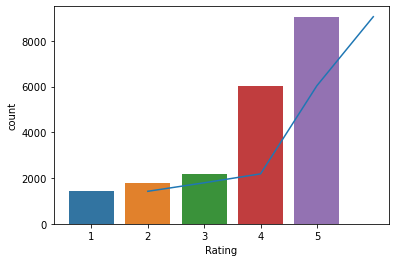

In [38]:
sns.countplot(df['Rating'])
df[df['Rating'] > 0]['Rating'].value_counts().sort_index().plot.line()